# Basic Feature Handling
- Filter, Select, Sort
- User Defined Functions
- Lambda Functions
- Create Basic Features
    - Numerical Binning
    - Create Flags
- Basic Summary

In [1]:
import pandas as pd
import numpy as np

In [20]:
df = pd.read_csv('Churn_Modelling.csv')
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## How many Countries does this bank have its presence?

In [22]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [23]:
df['Geography'].unique().tolist()

['France', 'Spain', 'Germany']

## Which Country has the most customers?

In [24]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

## Find the Top 10 Customers based on Credit Score and return only (Name and Credit Score)

In [25]:
top_10_cust_score = df[['Surname','CreditScore']].sort_values(by = ['CreditScore'], ascending=False).head(10)
top_10_cust_score

,Surname,CreditScore
792,Summers,850
4083,Kambinachi,850
4158,Davison,850
4157,Watson,850
7413,Vachon,850
4141,Moran,850
7470,Afanasyev,850
4104,Bezrukova,850
4071,H?,850
7371,Grant,850


## Select Top 10 Customers from Spain which have Tenure equal to 10

In [26]:
#Select from DataFrame using criteria from multiple columns
cust_spain = df[(df['Geography'] == 'Spain') & (df['Tenure'] == 10)].sort_values(by = ['CreditScore'], ascending=False).head(10)
cust_spain

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9646,9647,15603111,Muir,850,Spain,Male,71,10,69608.14,1,1,0,97893.40,1
1872,1873,15706593,Ellis,850,Spain,Female,50,10,0.00,2,1,1,33741.84,0
1799,1800,15612776,McKay,850,Spain,Female,39,10,0.00,2,1,1,143030.09,0
1556,1557,15772777,Onyemachukwu,850,Spain,Female,29,10,0.00,2,1,1,94815.04,0
632,633,15718673,Mirams,839,Spain,Female,33,10,75592.43,1,1,0,62674.42,0
6529,6530,15728823,Sharwood,836,Spain,Female,37,10,0.00,2,1,0,111324.41,0
7101,7102,15796569,Donaldson,831,Spain,Female,44,10,0.00,1,0,1,47729.33,0
7586,7587,15748532,Dale,828,Spain,Male,42,10,0.00,1,1,1,186071.14,0
4096,4097,15758775,Vasilyeva,820,Spain,Male,34,10,97208.46,1,1,1,59553.34,0
6715,6716,15763111,Niu,808,Spain,Female,67,10,124577.15,1,0,1,169894.40,0


## Convert Gender from Object to Numeric - Use Lambda

In [27]:
df['Gender'] = df['Gender'].apply(lambda x : 1 if x == 'Male' else 0)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  int64  
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 1.1+ MB


## Log Transform Age, Balance and Estimated Salary
- Transform then Replace in df 
- Write a Function
- Write a loop

In [29]:
numerical_features = ['Age', 'Balance', 'EstimatedSalary']

<AxesSubplot:>

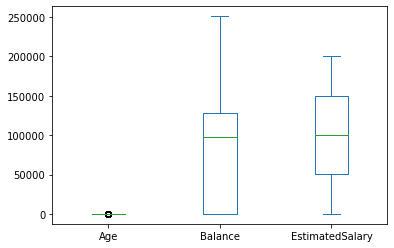

In [30]:
df[numerical_features].plot.box()

In [57]:
#df['Age'] = np.log(df['Age'])
#df['Balance'] = np.log(df['Balance']) 
#df['EstimatedSalary'] = np.log(df['EstimatedSalary'])

In [31]:
def log_transformation(feature):
    return np.log10(df[feature] + 1)

In [71]:
#df['Age'] = log_transformation('Age')

In [32]:
for feat in numerical_features: 
    df[feat] = log_transformation(feat)

<AxesSubplot:>

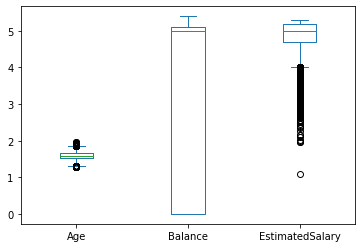

In [33]:
df[numerical_features].plot.box()